# Project : Movie Recommender System

**Creating Movie Recommender System**

In [2]:
import numpy as np
import pandas as pd

In [3]:
columns_names=['user_id','item_id','rating','timestamp']

In [4]:
df=pd.read_csv('u.data',sep='\t',names=columns_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
df.tail()

,user_id,item_id,rating,timestamp
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


In [7]:
movie_tiles=pd.read_csv('Movie_Id_Titles')

In [8]:
movie_tiles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df=pd.merge(df,movie_tiles,on='item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [11]:
df.tail()

,user_id,item_id,rating,timestamp,title
99998,880,476,3,880175444,"First Wives Club, The (1996)"
99999,716,204,5,879795543,Back to the Future (1985)
100000,276,1090,1,874795795,Sliver (1993)
100001,13,225,2,882399156,101 Dalmatians (1996)
100002,12,203,3,879959583,Unforgiven (1992)


In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [13]:
sns.set_style('white')

In [14]:
%matplotlib inline

In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Aiqing wansui (1994)                                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Name: rating, dtype: float64

In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [17]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [18]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
ratings['number of rating']=pd.DataFrame(df.groupby('title')['rating'].count())

In [20]:
ratings.head()

,rating,number of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

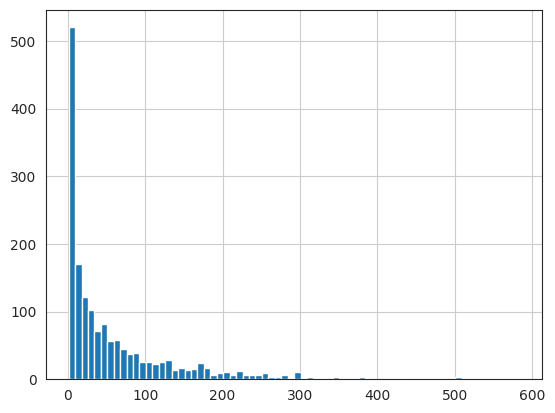

In [21]:
ratings['number of rating'].hist(bins=70)

<Axes: >

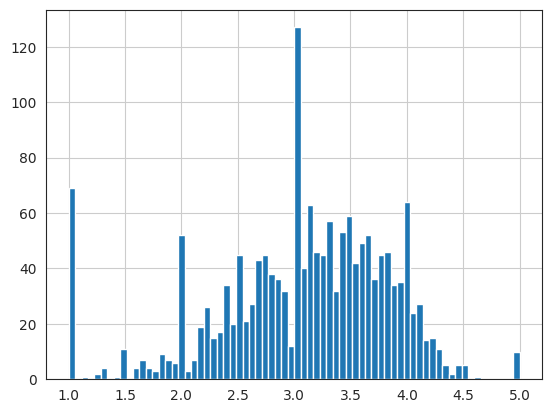

In [22]:
ratings['rating'].hist(bins=70)

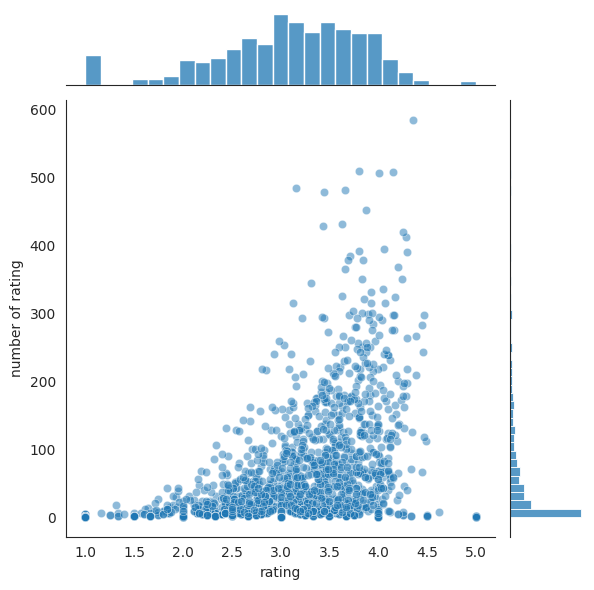

In [23]:
sns.jointplot(x='rating',y='number of rating',data=ratings,alpha=0.5)

In [24]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')

In [25]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ratings.sort_values('number of rating',ascending=False).head()

,rating,number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [27]:
starwars_user_ratings=moviemat['Star Wars (1977)']
liarliar_user_ratings=moviemat['Liar Liar (1997)']

In [28]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [29]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [30]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

/root/anaconda3/envs/myenv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/root/anaconda3/envs/myenv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/root/anaconda3/envs/myenv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/root/anaconda3/envs/myenv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/root/anaconda3/envs/myenv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [31]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings)

In [32]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [33]:
corr_starwars.dropna(inplace=True)

In [34]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [35]:
corr_starwars.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Man of the Year (1995),1.0
No Escape (1994),1.0
Commandments (1997),1.0
Cosi (1996),1.0


In [36]:
corr_starwars=corr_starwars.join(ratings['number of rating'])

In [37]:
corr_starwars.head()

,Correlation,number of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [38]:
corr_starwars[corr_starwars['number of rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [39]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [40]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [41]:
corr_liarliar.dropna(inplace=True)

In [42]:
corr_liarliar.sort_values('Correlation',ascending=False).head()

,Correlation
title,
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Mina Tannenbaum (1994),1.0
For Ever Mozart (1996),1.0
Of Human Bondage (1934),1.0
Johnny 100 Pesos (1993),1.0


In [43]:
corr_liarliar=corr_liarliar.join(ratings['number of rating'])

In [44]:
corr_liarliar.head()

,Correlation,number of rating
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [45]:
corr_liarliar[corr_liarliar['number of rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


**Hence like the way check recommendation for people that watched watch movies star wars and liar liar, we can recommend them movie on the basis of correlation,rating and number of ratings .Therefore the recommendation can be done for other movies too**